In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 1. Simple linear regression
## 1.1 Generating a dataset

In [33]:
# Make dataset
x_train = 10*np.random.rand(100)         # 100 data points in [0, 10]

noise = np.random.normal(0,1, 100)       # gaussian data, mean=0, std=1
y_train = (2*x_train + 8) + noise        # target is a linear function of the input with some noise

In [37]:
x_train.reshape(-1,1) # 100 rows, 1 column

array([[3.21532585],
       [0.31313585],
       [4.35739065],
       [5.92900274],
       [9.0763273 ],
       [5.94558923],
       [7.80435281],
       [3.41331599],
       [8.78939358],
       [3.43681415],
       [2.11350013],
       [6.77349681],
       [7.33566814],
       [6.01160003],
       [4.08502988],
       [5.81995344],
       [0.84152801],
       [5.6460801 ],
       [8.97714014],
       [6.36120323],
       [6.95776314],
       [0.71339046],
       [8.0116261 ],
       [9.80775627],
       [2.76838685],
       [9.67322127],
       [3.45272375],
       [6.98283922],
       [1.91742059],
       [8.81297488],
       [0.29456883],
       [3.35766582],
       [4.26662809],
       [1.40362429],
       [0.70841799],
       [9.75139376],
       [2.01773253],
       [1.94888317],
       [8.95575655],
       [0.72039216],
       [9.97586353],
       [5.67210369],
       [1.34483825],
       [9.1553899 ],
       [9.12230026],
       [7.93885216],
       [0.37427079],
       [4.249

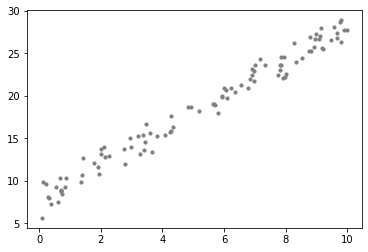

In [34]:
# Plots
fig, ax = plt.subplots()
ax.scatter(x_train, y_train, s=10, c='grey')

## 1.2 Training and fitting a regression model

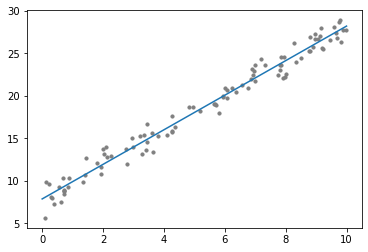

In [41]:
from sklearn.linear_model import LinearRegression

# Instantiate and train regressor `reg`
# The fit method requires as X a shape as (num_samples, num_features)
# Now we have a 1D array with only num_samples. Our num_features is equal to 1,
# hence, we have to reshape and obtain (100,1)
# We exploit "-1" to infer the number of rows
reg = LinearRegression(fit_intercept=True).fit(x_train.reshape(-1,1), y_train)

# Predict for 50 equally spaced values in [0, 10]
x_test = np.linspace(0, 10, 50)

# Use the regressor to predict the y for x_test
# See above for the reason concerning reshape
y_test = reg.predict(x_test.reshape(-1,1))

# Plots
fig, ax = plt.subplots()
ax.scatter(x_train, y_train, s=10, c='grey') # display points
ax.plot(x_test, y_test) # display linear model

## 1.3 Evaluating regression

Use cross-validation with k=3 folds to evaluate a linear regressor.

Evaluate the results with R2 score, mean absolute error and mean squared error.

Use both `cross_val_score` and `cross_val_predict`

In [64]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

reg = LinearRegression()

score_names = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
# Scores obtained using cross_val_score
val_scores = {}
# Scores obtained by calling r2_score, mean_squared_error, mean_absolute_error after cross_val_predict
pred_scores = {}
for name in score_names:
    # Friendly reminder, x_train must be in the form (num_samples, num_features)
    cv_score = cross_val_score(reg, x_train.reshape(-1,1), y_train, cv=3, scoring=name)
    val_scores[name] = np.abs(cv_score).mean()

preds = cross_val_predict(reg, x_train.reshape(-1,1), y_train, cv=3)

pred_scores["r2"] = r2_score(y_train, preds)
pred_scores["mae"] = mean_absolute_error(y_train, preds)
pred_scores["mse"] = mean_squared_error(y_train, preds)

for i,j in zip(val_scores.items(), pred_scores.items()):
    print(f"Difference between {i[0]} val and pred is: {i[1] - j[1]:.3f}")

Difference between r2 val and pred is: -0.001
Difference between neg_mean_absolute_error val and pred is: 0.001
Difference between neg_mean_squared_error val and pred is: 0.002


# 2. Linear regression with multiple input features

## 2.1 Generating a dataset

In [65]:
# Make dataset
X_train = 10*np.random.rand(1000, 2)    # 1000 data points, 2 features (x0, x1) in the range [0, 10]

noise = np.random.normal(0,2, 1000)     # 1000 points from gaussian, mean=0, std=2
y_train = (-2*X_train[:,0] + 3*X_train[:,1]  - 4) + noise

Text(0.5, 0, 'y')

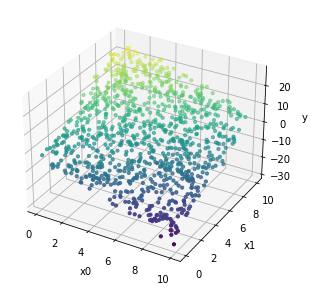

In [66]:
# Plots
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, s=10, c=y_train)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')

## 2.2 Training and fitting a regression model

Text(0.5, 0, 'y')

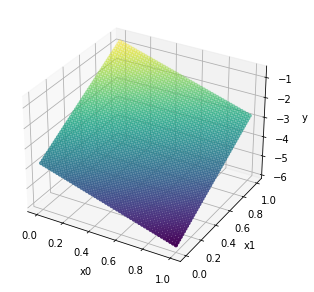

In [67]:
# Train regression
reg = LinearRegression()
reg.fit(X_train, y_train)

# Make a grid of 50 equally spaced values
values = np.linspace(0,1,50)
X_test = np.array([[x0, x1] for x0 in values for x1 in values])
# Predict values on the grid
y_test = reg.predict(X_test)

# Plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], y_test, s=10, c=y_test)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')

## 2.3 Display the coefficients and the bias (intercept) terms learned by the regressor

In [68]:
reg.coef_

array([-2.01438933,  3.0008574 ])

In [69]:
reg.intercept_

-3.8036380140476105